#### Note: This is the final iteration BEFORE upsampling to the data is done.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train[187]).astype(int)
y_test = to_categorical(test[187]).astype(int)

In [5]:
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [6]:
X_train = train.iloc[:,:187].values
X_test = test.iloc[:,:187].values

In [7]:
X_train

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
X_train.shape

(87554, 187)

In [11]:
X_train = np.reshape(X_train, (87554, 187, 1))

In [12]:
X_train.shape

(87554, 187, 1)

In [42]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

in_nn = Input(shape=(X_train.shape[1],X_train.shape[2]), name='in_nn')

lstm1 = LSTM(units=128, name='lstm1', return_sequences = True)(in_nn)   #(takes in for shape (batch_size, size1, size2))
lstm2 = LSTM(units=64, name='lstm2', return_sequences = True)(lstm1)
lstm3 = LSTM(units=64, name='lstm3', return_sequences = True)(lstm2)
flatten = Flatten()(lstm3)
dense1 = Dense(units=64, activation='relu', name='dense1')(flatten)
dense2 = Dense(units=32, activation='relu', name='dense2')(dense1)
dense3 = Dense(units=5, activation='softmax', name='dense3')(flatten)

model = Model(inputs=in_nn, outputs=dense3)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_nn (InputLayer)          [(None, 187, 1)]          0         
                                                                 
 lstm1 (LSTM)                (None, 187, 128)          66560     
                                                                 
 lstm2 (LSTM)                (None, 187, 64)           49408     
                                                                 
 lstm3 (LSTM)                (None, 187, 64)           33024     
                                                                 
 flatten_7 (Flatten)         (None, 11968)             0         
                                                                 
 dense3 (Dense)              (None, 5)                 59845     
                                                                 
Total params: 208,837
Trainable params: 208,837
Non-trainab

In [46]:
history = model.fit(X_train, y_train, epochs=15, batch_size=16)

Epoch 1/15
5473/5473 [==============================] - 149s 27ms/step - loss: 0.1515 - accuracy: 0.9577
Epoch 2/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.1110 - accuracy: 0.9686
Epoch 3/15
5473/5473 [==============================] - 151s 28ms/step - loss: 0.0916 - accuracy: 0.9742
Epoch 4/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.0787 - accuracy: 0.9775
Epoch 5/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.0696 - accuracy: 0.9801
Epoch 6/15
5473/5473 [==============================] - 152s 28ms/step - loss: 0.0629 - accuracy: 0.9815
Epoch 7/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.0570 - accuracy: 0.9835
Epoch 8/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.0518 - accuracy: 0.9841
Epoch 9/15
5473/5473 [==============================] - 153s 28ms/step - loss: 0.0488 - accuracy: 0.9856
Epoch 10/15
5473/5473 [==============================] 

In [47]:
history.history

{'loss': [0.15147484838962555,
  0.1109917014837265,
  0.09164193272590637,
  0.07869278639554977,
  0.06964223086833954,
  0.06288131326436996,
  0.05696609988808632,
  0.051811907440423965,
  0.0487961508333683,
  0.04508059471845627,
  0.041896216571331024,
  0.03852442651987076,
  0.03659701347351074,
  0.033721085637807846,
  0.031182890757918358],
 'accuracy': [0.957683265209198,
  0.9686250686645508,
  0.9741644859313965,
  0.9774881601333618,
  0.9801037311553955,
  0.9814742803573608,
  0.9835301637649536,
  0.9841126799583435,
  0.9855632185935974,
  0.9860657453536987,
  0.9870251417160034,
  0.9877675771713257,
  0.988247275352478,
  0.989115297794342,
  0.9899604916572571]}

In [48]:
# Evaluate on the test data

results = model.evaluate(X_test, y_test, batch_size=16)

1369/1369 [==============================] - 17s 12ms/step - loss: 0.0770 - accuracy: 0.9831


In [49]:
print("test loss, test acc:", results)

test loss, test acc: [0.07697578519582748, 0.9830988645553589]


In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([[1.00e+00, 1.45e-05, 1.56e-07, 4.41e-09, 2.02e-11],
       [1.00e+00, 5.75e-05, 9.55e-05, 4.65e-06, 1.21e-10],
       [1.00e+00, 1.53e-06, 2.34e-10, 4.37e-14, 3.19e-14],
       ...,
       [6.27e-04, 1.64e-05, 1.35e-04, 3.48e-08, 9.99e-01],
       [8.41e-10, 6.18e-10, 1.23e-09, 1.32e-14, 1.00e+00],
       [4.87e-12, 2.97e-09, 5.33e-10, 2.80e-17, 1.00e+00]], dtype=float32)

Normalized confusion matrix


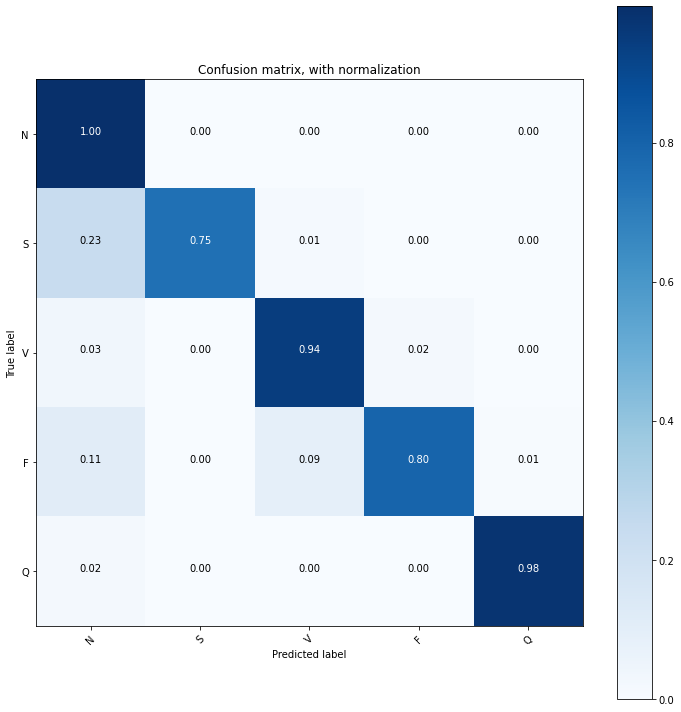

In [52]:
# The following function plots the confusion matrix. Can toggle normalization.

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix')
plt.show()